4.476386557307572


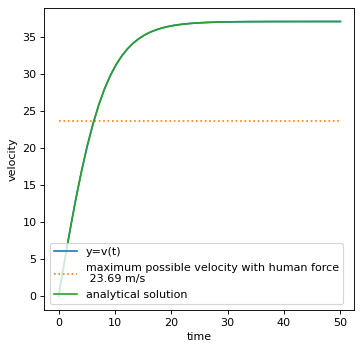

In [7]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 1 # kg
k_air=0.00324844 # kg/m
epsilon=0.5
F_M = 13 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
theta = 4

A=F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00))
print(A)
# function that returns dy/dt
def velocity(v,t):
    dvdt = ( F_M-k_air*(v**2)-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)) )/m
    return dvdt

# initial condition
v0 = 0

# time points
t = np.linspace(0,50)

# solve ODE
v = odeint(velocity,v0,t)
analytical = [0 for i in range(len(t))]
for i in range(len(t)):
    analytical[i] = (math.sqrt(A)*np.tanh( (t[i]*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))

l = [23.69322586 for i in range (len(t))]
fig = plt.figure(figsize=(5,5), dpi=80)
# plot results
plt.plot(t,v)
plt.plot(t,l,':')
plt.plot(t,analytical)
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['y=v(t)','maximum possible velocity with human force\n 23.69 m/s','analytical solution'])
plt.show()

In [25]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

LEFT = 0
RIGHT = 23
DOWN = -500
UP = 3000

sigma = 41.5
E_total = 2403.5
INTERVAL = 0.1

t=np.arange(LEFT,RIGHT,INTERVAL)

def integrand(t):
    return (math.sqrt(A)*np.tanh( (t*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))
def with_bonds(a,b):
    inte=quad(integrand,a,b)
    return inte[0]
    
integral_result = [0 for i in range(len(t))]
for i in range(len(t)):
    integral_result[i] = with_bonds(0,t[i])

energy = [0 for i in range(len(t))]
for i in range(len(t)):
    energy[i] = sigma*t[i] - epsilon*m*F_M*integral_result[i]

energy_final = [energy[i]+E_total for i in range(len(t))]


# for the figure itself

fig = plt.figure(figsize=(5,5), dpi=80)

def find_first_zero(theta):
    for i in range(len(t)-1):
        if(energy_final[i]*energy_final[i+1]<=0):
            return round(i*INTERVAL,2)
        else:
            continue
fstzero = find_first_zero(theta)
            
plt.plot(t,energy_final)
plt.plot(fstzero,0,'ro')
plt.annotate('('+str(fstzero)+',0)',xy = (fstzero,0),xytext = (fstzero+INTERVAL,100))
plt.xlabel('time')
plt.ylabel('energy')
plt.legend(['the remaining energy','transition point'])
plt.xticks(np.arange(LEFT+5,RIGHT,5))
plt.yticks(np.arange(DOWN,UP,400))
 
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

print(energy_final[195])
# print(fstzero)

TypeError: must be real number, not list

509.62675841700093


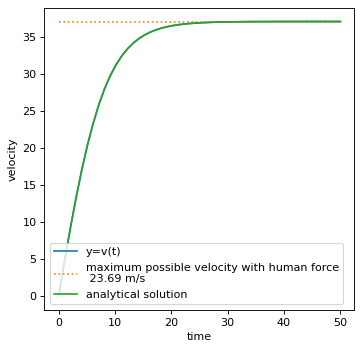

In [9]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k_air=0.00324844 # kg/m
# F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
theta = 4

A=F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00))

# function that returns dy/dt
def velocity(v,t):
    dvdt = ( F_M-k_air*(v**2)-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)) )/m
    return dvdt

# initial condition
v0 = 0

# time points
t = np.linspace(0,50)

# solve ODE
v = odeint(velocity,v0,t)
analytical = [0 for i in range(len(t))]
for i in range(len(t)):
    analytical[i] = (math.sqrt(A)*np.tanh( (t[i]*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))

l = [analytical[len(t)-1] for i in range (len(t))]
fig = plt.figure(figsize=(5,5), dpi=80)

print(with_bonds(0,19.4))
# plot results
plt.plot(t,v)
plt.plot(t,l,':')
plt.plot(t,analytical)
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['y=v(t)','maximum possible velocity with human force\n 23.69 m/s','analytical solution'])
plt.show()

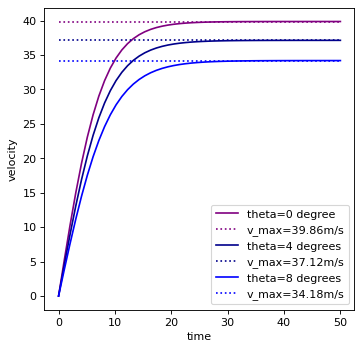

In [10]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k_air=0.00324844 # kg/m
# F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
# theta = 15

INF = 999999

def get_A(theta):
    return (F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)))

t = np.linspace(0,50)

theta=[0,4,8]
upper=[0,0,0]
A=[0,0,0]
analytical=[[0 for i in range(len(t))] for j in range(3)]
for i in range(3):
    A[i]=get_A(theta[i])
    for j in range(len(t)):
        analytical[i][j] = (math.sqrt(A[i])*np.tanh( (t[j]*math.sqrt(A[i]*k_air))/m ))/(math.sqrt(k_air))
    upper[i] = (math.sqrt(A[i])*np.tanh( (INF*math.sqrt(A[i]*k_air))/m ))/(math.sqrt(k_air))

    
newupper=[[0 for j in range(len(t))] for i in range(3)]
for i in range(3):
    newupper[i]=[upper[i] for j in range(len(t))]
colorset=['purple','darkblue','blue']
fig = plt.figure(figsize=(5,5), dpi=80)
for i in range(3):
    plt.plot(t,analytical[i],c=colorset[i])
    plt.plot(t,newupper[i],':',c=colorset[i])

plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['theta=0 degree','v_max='+str(round(upper[0],2))+'m/s',
            'theta=4 degrees','v_max='+str(round(upper[1],2))+'m/s',
            'theta=8 degrees','v_max='+str(round(upper[2],2))+'m/s'])
plt.show()    

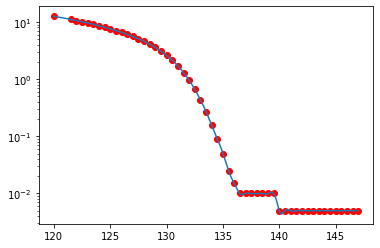

In [11]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

import numpy as np

x = np.array([ 120. ,  121.5,  122. ,  122.5,  123. ,  123.5,  124. ,  124.5,
        125. ,  125.5,  126. ,  126.5,  127. ,  127.5,  128. ,  128.5,
        129. ,  129.5,  130. ,  130.5,  131. ,  131.5,  132. ,  132.5,
        133. ,  133.5,  134. ,  134.5,  135. ,  135.5,  136. ,  136.5,
        137. ,  137.5,  138. ,  138.5,  139. ,  139.5,  140. ,  140.5,
        141. ,  141.5,  142. ,  142.5,  143. ,  143.5,  144. ,  144.5,
        145. ,  145.5,  146. ,  146.5,  147. ])

y = np.array([  1.25750000e+01,   1.10750000e+01,   1.05750000e+01,
         1.00750000e+01,   9.57500000e+00,   9.07500000e+00,
         8.57500000e+00,   8.07500000e+00,   7.57500000e+00,
         7.07500000e+00,   6.57500000e+00,   6.07500000e+00,
         5.57500000e+00,   5.07500000e+00,   4.57500000e+00,
         4.07500000e+00,   3.57500000e+00,   3.07500000e+00,
         2.60500000e+00,   2.14500000e+00,   1.71000000e+00,
         1.30500000e+00,   9.55000000e-01,   6.65000000e-01,
         4.35000000e-01,   2.70000000e-01,   1.55000000e-01,
         9.00000000e-02,   5.00000000e-02,   2.50000000e-02,
         1.50000000e-02,   1.00000000e-02,   1.00000000e-02,
         1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
         1.00000000e-02,   1.00000000e-02,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03])

y_spl = UnivariateSpline(x,y,s=0,k=4)

plt.semilogy(x,y,'ro',label = 'data')
x_range = np.linspace(x[0],x[-1],1000)
plt.semilogy(x_range,y_spl(x_range))



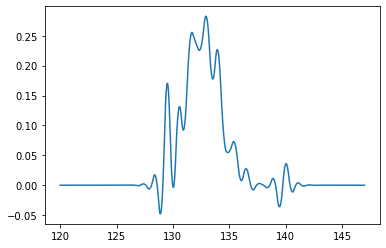

In [12]:
y_spl_2d = y_spl.derivative(n=2)

plt.plot(x_range,y_spl_2d(x_range))

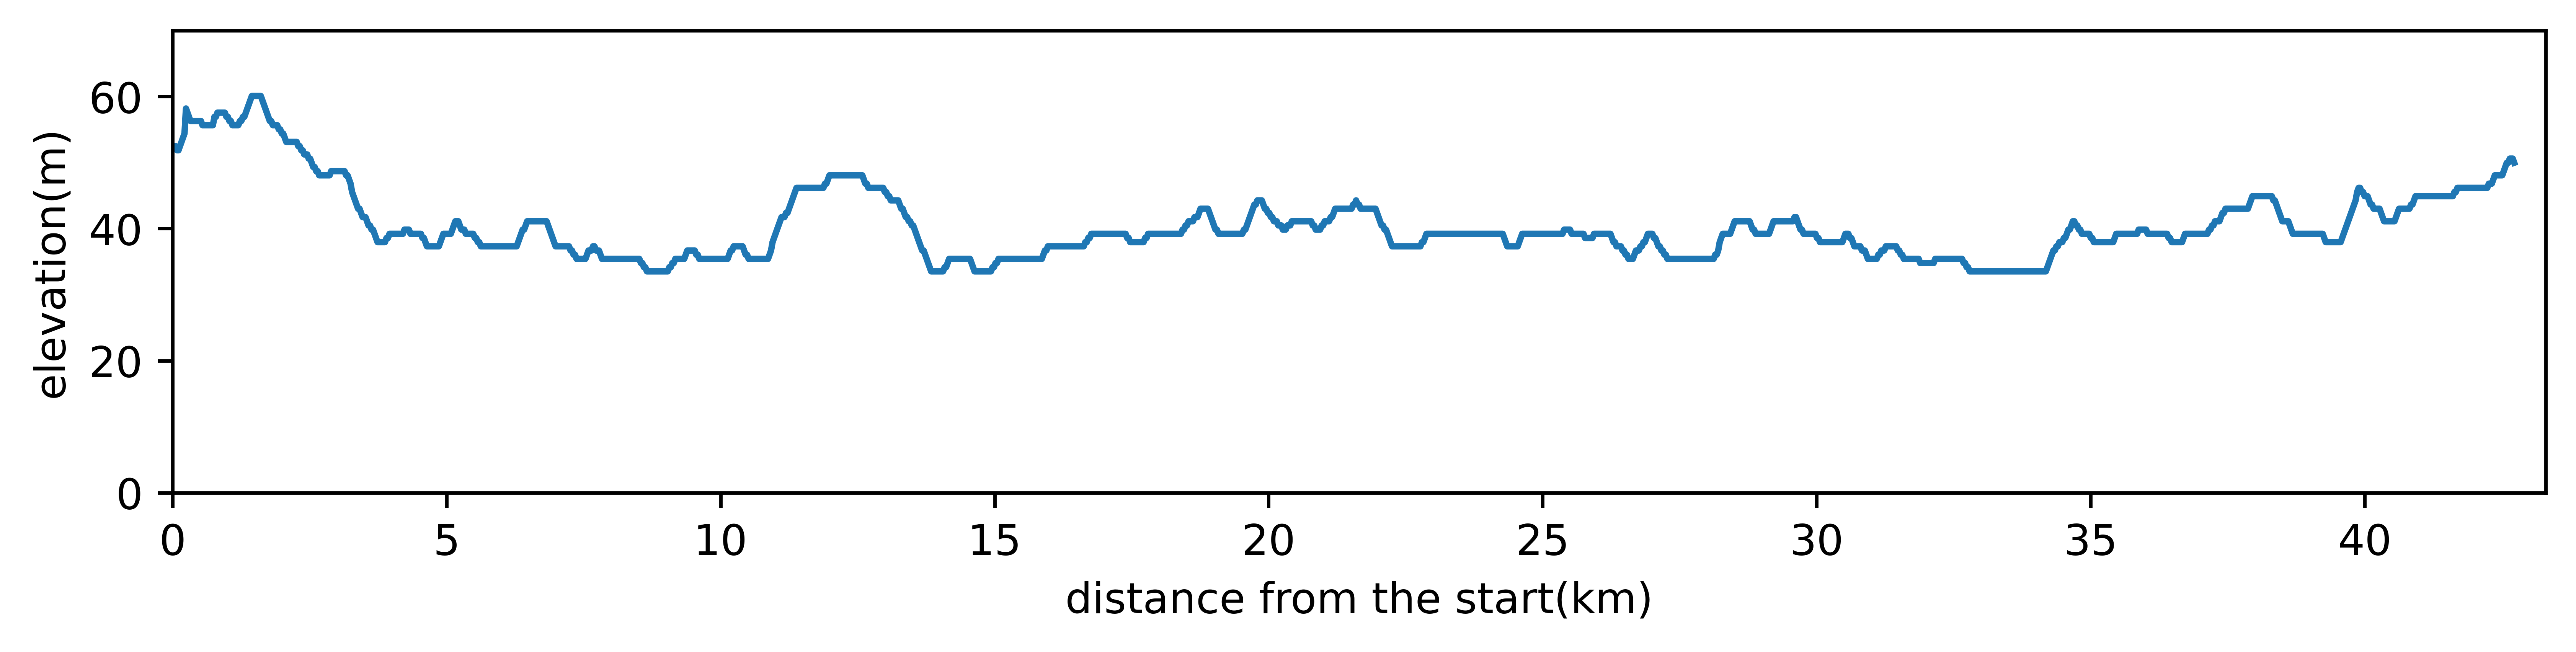

In [13]:
from PIL import Image
import numpy as np
im=Image.open(r"H:\stOOrz-Mathematical-Modelling-Group\MCM-ICM_2022\Images\uci-2.png")
maxns=[0 for i in range(10000)]
for x in range(im.size[0]):
    tot=0
#    print(x)
    for y in range(im.size[1]):
        pix=im.getpixel((x,y))
        if(pix[3]==255):
            tot+=1
        else:
            maxns[x]=max(maxns[x],tot)
            tot=0
        pre=pix
        maxns[x]=max(maxns[x],tot)
# print(maxns[sz-50:sz])
import matplotlib.pyplot as plt
datax = datay = [0 for i in range(im.size[0])]
datax=range(im.size[0])
for i in range(im.size[0]):
    datay[i]=maxns[datax[i]]
sz = im.size[0]
new_data = [0 for i in range(sz)]

stretch = sz/43.3
newdatax = [(i-11)/stretch for i in range(sz)]
newdatay = [datay[i]*52.5/83 for i in range(sz)]

fig=plt.figure(figsize=(10,2),dpi=800)
plt.plot(newdatax[12:sz-9],newdatay[12:sz-9])
plt.ylim(0,70)
plt.xlim(0,43.3)
plt.xlabel('distance from the start(km)')
plt.ylabel('elevation(m)')
plt.show()


In [ ]:
1586/43.3

In [ ]:
95

In [ ]:
math.atan(1000/18000)/math.pi*180

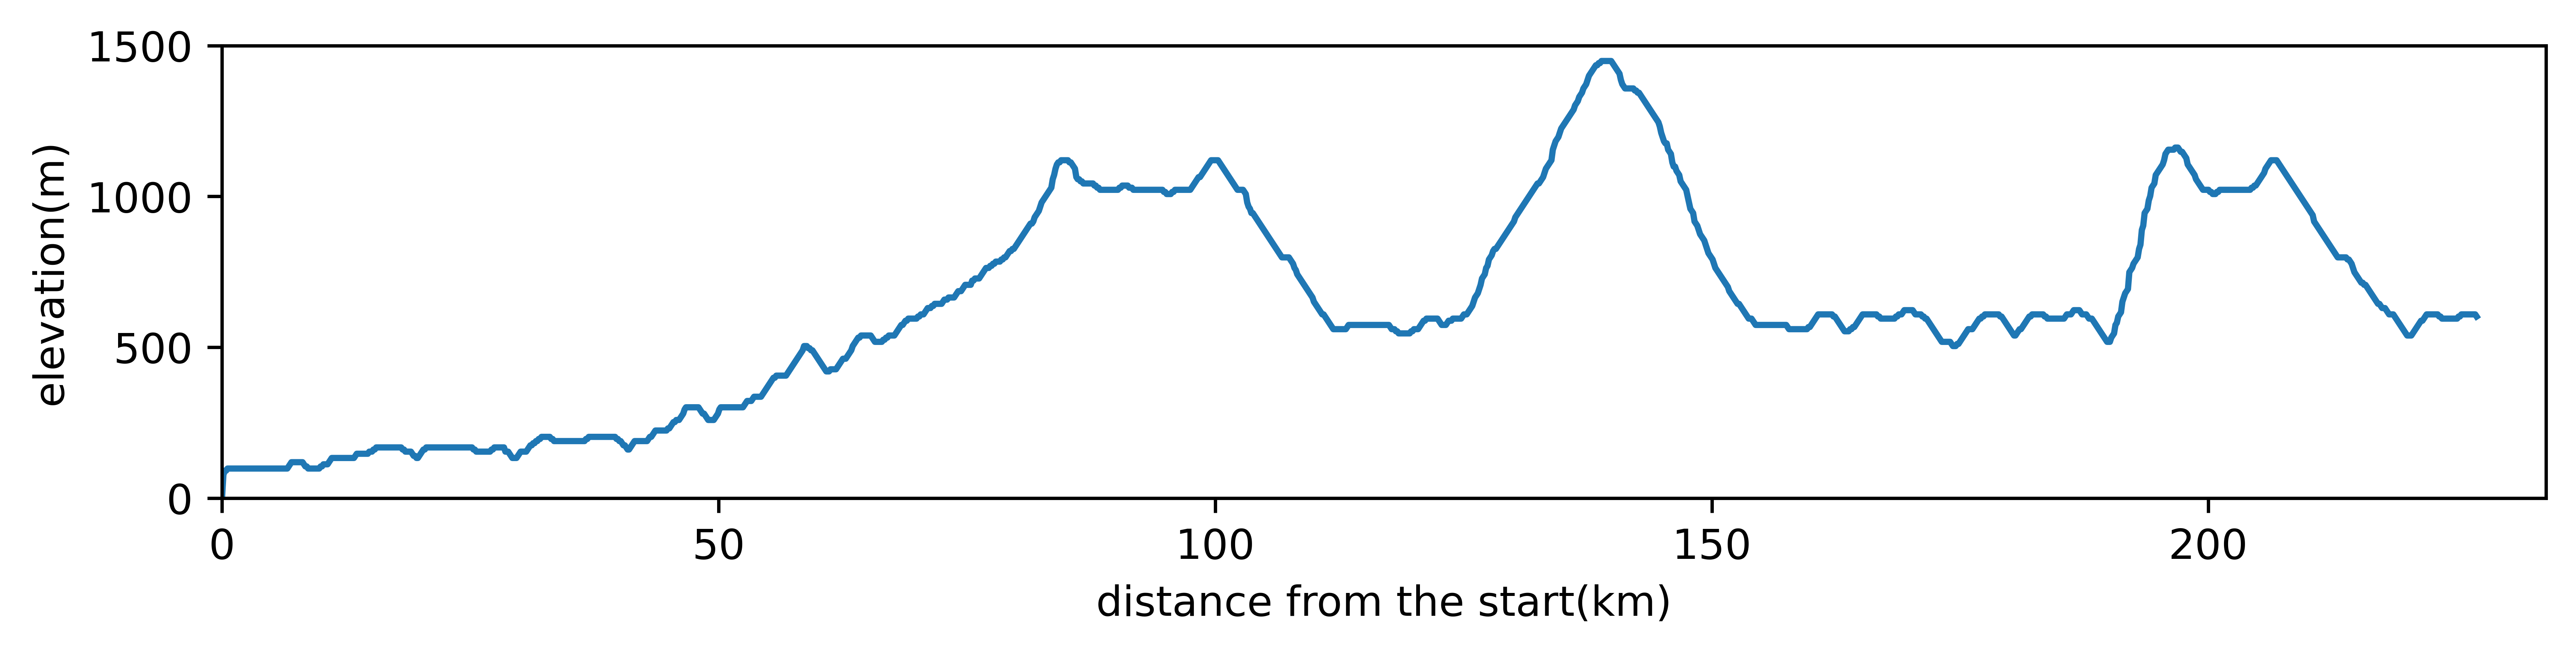

In [15]:
from PIL import Image
im=Image.open(r"H:\stOOrz-Mathematical-Modelling-Group\MCM-ICM_2022\Images\tokyo-course-adjusted2.png")
maxns=[0 for i in range(10000)]
for x in range(im.size[0]):
    tot=0
#     print(x)
    for y in range(im.size[1]):
        pix=im.getpixel((x,y))
        if pix!=(0, 0, 0, 255):
#             print(pix)
            tot=tot+1
    maxns[x]=tot
import matplotlib.pyplot as plt
datax = datay = [0 for i in range(im.size[0])]
datax=range(im.size[0])
for i in range(im.size[0]):
    datay[i]=maxns[datax[i]]
sz = im.size[0]
new_data = [0 for i in range(sz)]

stretch = sz/234
newdatax = [(i-49)/stretch for i in range(sz)]
newdatay = [datay[i]*1400/200 for i in range(sz)]

fig=plt.figure(figsize=(10,2),dpi=800)
plt.plot(newdatax,newdatay)
plt.ylim(0,1500)
plt.xlim(0,234)
plt.xlabel('distance from the start(km)')
plt.ylabel('elevation(m)')
plt.show()

In [ ]:
len('0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ')

In [19]:
# the relationship between 

import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k_air=0.00324844 # kg/m
# F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
theta = 4

def find_first_zero(theta):
    for i in range(len(t)-2):
        if(energy_final[i]*energy_final[i+1]<=0):
            return round(i*INTERVAL,2)
        else:
            continue

def max_first_phase_distance(theta):
    A=F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00))

    # function that returns dy/dt
    def velocity(v,t):
        dvdt = ( F_M-k_air*(v**2)-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)) )/m
        return dvdt

    # initial condition
    v0 = 0

    # time points
    t = np.linspace(0,50)

    # solve ODE
    v = odeint(velocity,v0,t)
    analytical = [0 for i in range(len(t))]
    for i in range(len(t)):
        analytical[i] = (math.sqrt(A)*np.tanh( (t[i]*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))

    l = [analytical[len(t)-1] for i in range (len(t))]

    return with_bonds(0,find_first_zero(theta))
# print(max_first_phase_distance(4))

dtx = np.arange(-8,8,0.01)
# dty = [max_first_phase_distance(dtx[i]) for i in range(len(dtx))]
# plt.plot(dtx,dty)
# plt.show()

# for i in range(len(dtx)):
#     print(max_first_phase_distance(dtx[i]))

In [23]:
print(find_first_zero(4))

None


In [3]:
import string

In [4]:
s='壬戌之秋，七月既望，苏子与客泛舟游于赤壁之下。清风徐来，水波不兴。举酒属客，诵明月之诗，歌窈窕之章。少焉，月出于东山之上，徘徊于斗牛之间。白露横江，水光接天。纵一苇之所如，凌万顷之茫然。浩浩乎如冯虚御风，而不知其所止；飘飘乎如遗世独立，羽化而登仙。于是饮酒乐甚，扣舷而歌之。歌曰：“桂棹兮兰桨，击空明兮溯流光。渺渺兮予怀，望美人兮天一方。”客有吹洞箫者，倚歌而和之。其声呜呜然，如怨如慕，如泣如诉，余音袅袅，不绝如缕。舞幽壑之潜蛟，泣孤舟之嫠妇。苏子愀然，正襟危坐而问客曰：“何为其然也？”客曰：“月明星稀，乌鹊南飞，此非曹孟德之诗乎？西望夏口，东望武昌，山川相缪，郁乎苍苍，此非孟德之困于周郎者乎？方其破荆州，下江陵，顺流而东也，舳舻千里，旌旗蔽空，酾酒临江，横槊赋诗，固一世之雄也，而今安在哉？况吾与子渔樵于江渚之上，侣鱼虾而友麋鹿，驾一叶之扁舟，举匏樽以相属。寄蜉蝣于天地，渺沧海之一粟。哀吾生之须臾，羡长江之无穷。挟飞仙以遨游，抱明月而长终。知不可乎骤得，托遗响于悲风。”苏子曰：“客亦知夫水与月乎？逝者如斯，而未尝往也；盈虚者如彼，而卒莫消长也。盖将自其变者而观之，则天地曾不能以一瞬；自其不变者而观之，则物与我皆无尽也，而又何羡乎!且夫天地之间，物各有主,苟非吾之所有，虽一毫而莫取。惟江上之清风，与山间之明月，耳得之而为声，目遇之而成色，取之无禁，用之不竭，是造物者之无尽藏也，而吾与子之所共适。”客喜而笑，洗盏更酌。肴核既尽，杯盘狼籍。相与枕藉乎舟中，不知东方之既白。'

In [11]:
for c in s:
    if c in {'，','。','！','？','“','”','：','；'}:
        s=s.replace(c,'')

In [12]:
s

'壬戌之秋七月既望苏子与客泛舟游于赤壁之下清风徐来水波不兴举酒属客诵明月之诗歌窈窕之章少焉月出于东山之上徘徊于斗牛之间白露横江水光接天纵一苇之所如凌万顷之茫然浩浩乎如冯虚御风而不知其所止飘飘乎如遗世独立羽化而登仙于是饮酒乐甚扣舷而歌之歌曰桂棹兮兰桨击空明兮溯流光渺渺兮予怀望美人兮天一方客有吹洞箫者倚歌而和之其声呜呜然如怨如慕如泣如诉余音袅袅不绝如缕舞幽壑之潜蛟泣孤舟之嫠妇苏子愀然正襟危坐而问客曰何为其然也客曰月明星稀乌鹊南飞此非曹孟德之诗乎西望夏口东望武昌山川相缪郁乎苍苍此非孟德之困于周郎者乎方其破荆州下江陵顺流而东也舳舻千里旌旗蔽空酾酒临江横槊赋诗固一世之雄也而今安在哉况吾与子渔樵于江渚之上侣鱼虾而友麋鹿驾一叶之扁舟举匏樽以相属寄蜉蝣于天地渺沧海之一粟哀吾生之须臾羡长江之无穷挟飞仙以遨游抱明月而长终知不可乎骤得托遗响于悲风苏子曰客亦知夫水与月乎逝者如斯而未尝往也盈虚者如彼而卒莫消长也盖将自其变者而观之则天地曾不能以一瞬自其不变者而观之则物与我皆无尽也而又何羡乎且夫天地之间物各有主苟非吾之所有虽一毫而莫取惟江上之清风与山间之明月耳得之而为声目遇之而成色取之无禁用之不竭是造物者之无尽藏也而吾与子之所共适客喜而笑洗盏更酌肴核既尽杯盘狼籍相与枕藉乎舟中不知东方之既白'

In [1]:
s='天命之谓性2，率性之谓道3，修道之谓教4。道也者，不可须臾离也，可离非道也。是故君子戒慎乎其所不睹5，恐惧乎其所不闻6。莫见乎隐7，莫显乎微，故君子慎其独也8。喜怒哀乐之未发9，谓之中10；发而皆中节11，谓之和12；中也者，天下之大本也13；和也者，天下之达道也14。致中和15，天地位焉16，万物育焉17。仲尼曰18：“君子中庸，小人反中庸，君子之中庸也，君子而时中19；小人之中庸也，小人而无忌惮也。”子曰：“中庸其至矣乎20！民鲜能久矣21！”子曰：“道之不行也22，我知之矣：知者过之23，愚者不及也。道之不明也，我知之矣：贤者过之，不肖者不及也。人莫不饮食也，鲜能知味也。”子曰：“道其不行矣夫24！”子曰：“舜其大知也与25！舜好问而好察迩言26，隐恶而扬善，执其两端，用其中于民，其斯以为舜乎！”子曰：“人皆曰予知，驱而纳诸罟擭陷阱之中27，而莫之知辟也28。人皆曰予知，择乎中庸，而不能期月守也29。”子曰：“回之为人也30，择乎中庸，得一善，则拳拳服膺而弗失之矣31。”子曰：“天下国家可均也32，爵禄可辞也33，白刃可蹈也34，中庸不可能也。”子路问强35，子曰：“南方之强与？北方之强与？抑而强与36？宽柔以教，不报无道37，南方之强也，君子居之38。衽金革39，死而不厌40，北方之强也，而强者居之。故君子和而不流41，强哉矫42！中立而不倚43，强哉矫！国有道，不变塞焉44，强哉矫！国无道，至死不变，强哉矫！”子曰：“素隐行怪45，后世有述焉，吾弗为之矣。君子遵道而行，半涂而废，吾弗能已矣46。君子依乎中庸，遁世不见知而不悔47，唯圣者能之。”君子之道，费而隐48。夫妇之愚49，可以与知焉50，及其至也51，虽圣人亦有所不知焉。夫妇之不肖52，可以能行焉；及其至也，虽圣人亦有所不能焉。天地之大也，人犹有所憾53。故君子语大54，天下莫能载焉；语小，天下莫能破焉55。《诗》云：“鸢飞戾天56，鱼跃于渊57。”言其上下察也58。君子之道，造端乎夫妇59，及其至也，察乎天地。子曰：“道不远人60，人之为道而远人，不可以为道。《诗》云：‘伐柯，伐柯61，其则不远。’执柯以伐柯，睨而视之62，犹以为远。故君子以人治人，改而止。忠恕违道不远63，施诸己而不愿，亦勿施于人。君子之道四，丘未能一焉64，所求乎子，以事父65，未能也；所求乎臣，以事君，未能也；所求乎弟，以事兄，未能也；所求乎朋友，先施之，未能也。庸德之行，庸言之谨；有所不足，不敢不勉，有余，不敢尽；言顾行，行顾言，君子胡不慥慥尔66！”君子素其位而行67，不愿乎其外。素富贵，行乎富贵；素贫贱，行乎贫贱；素夷狄68，行乎夷狄；素患难行乎患难，君子无入而不自得焉。在上位不陵下，在下位不援上，正己而不求于人，则无怨。上不怨天，下不尤人。故君子居易以俟命69。小人行险以徼幸70。子曰：“射有似乎君子71，失诸正鹄72，反求诸其身。”君子之道，辟如行远必自迩，辟如登高必自卑73。《诗》曰：“妻子好合，如鼓瑟琴74。兄弟既翕75，和乐且耽76。宜尔室家，乐尔妻帑77。”子曰：“父母其顺矣乎！”子曰：“鬼神之为德78，其盛矣乎？视之而弗见，听之而弗闻，体物而不可遗，使天下之人齐明盛服，以承祭祀。洋洋乎如在其上，如在其左右。《诗》曰：‘神之格思78，不可度思79！矧可射思80！’夫微之显81，诚之不可掩如此夫82。”子曰：“舜其大孝也与！德为圣人，尊为天子，富有四海之内。宗庙飨之83，子孙保之。故大德必得其位，必得其禄。必得其名，必得其寿，故天之生物，必因其材而笃焉。故栽者培之，倾者覆之。《诗》曰：‘嘉乐君子84，宪宪令德85。宜民宜人，受禄于天，保佑命之，自天申之。’故大德者必受命86。”子曰：“无忧者，其惟文王乎87！以王季为父88，以武王为子89，父作之，子述之90。武王缵大王、王季、文王之绪91，壹戎衣而有天下92。身不失天下之显名，尊为天子，富有四海之内。宗庙飨之，子孙保之。武王末受命，周公成文、武之德93，追王大王、王季，上祀先公以天子之礼。斯礼也，达乎诸侯大夫，及士庶人。父为大夫，子为士，葬以大夫，祭以士。父为士，子为大夫，葬以士，祭以大夫。期之丧，达乎大夫。三年之丧，达乎天子。父母之丧，无贵贱一也。”子曰：“武王、周公，其达孝矣乎94！夫孝者，善继人之志，善述人之事者也。春秋修其祖庙95，陈其宗器96，设其裳衣97，荐其时食98。宗庙之礼，所以序昭穆也99。序爵100，所以辨贵贱也。序事101，所以辨贤也。旅酬下为上，所以逮贱也102。燕毛103，所以序齿也。践其位，行其礼，奏其乐，敬其所尊，爱其所亲，事死如事生，事亡如事存，孝之至也。郊社之礼，所以事上帝也104。宗庙之礼，所以祀乎其先也。明乎郊社之礼105、禘尝之义106，治国其如示诸掌乎！”哀公问政107。子曰：“文武之政，布在方策108。其人存，则其政举；其人亡，则其政息。人道敏政，地道敏树。夫政也者，蒲卢也109。故为政在人，取人以身，修身以道，修道以仁。仁者人也。亲亲为大110；义者宜也。尊贤为大。亲亲之杀111，尊贤之等，礼所生也。在下位不获乎上，民不可得而治矣112！故君子不可以不修身；思修身，不可以不事亲；思事亲，不可以不知人，思知人，不可以不知天。天下之达道五，所以行之者三。曰：君臣也，父子也，夫妇也，昆弟也，朋友之交也，五者天下之达道也。知，仁，勇，三者天下之达德也，所以行之者一也。或生而知之，或学而知之，或困而知之，及其知之一也。或安而行之，或利而行之，或勉强而行之，及其成功，一也。”子曰：“好学近乎知，力行近乎仁，知耻近乎勇。知斯三者，则知所以修身；知所以修身，则知所以治人；知所以治人，则知所以治天下国家矣。凡为天下国家有九经113，曰：修身也。尊贤也，亲亲也，敬大臣也，体群臣也。子庶民也114，来百工也115，柔远人也116，怀诸侯也117。修身则道立，尊贤则不惑，亲亲则诸父昆弟不怨，敬大臣则不眩，体群臣则士之报礼重，子庶民则百姓劝，来百工则财用足，柔远人则四方归之，怀诸侯则天下畏之。齐明盛服，非礼不动。所以修身也；去谗远色，贱货而贵德，所以劝贤也；尊其位，重其禄，同其好恶118，所以劝亲亲也；官盛任使119，所以劝大臣也；忠信重禄，所以劝士也；时使薄敛120，所以劝百姓也；日省月试121，既廪称事122，所以劝百工也；送往迎来，嘉善而矜不能，所以柔远人也；继绝世123，举废国124，治乱持危。朝聘以时125，厚往而薄来，所以怀诸侯也。凡为天下国家有九经，所以行之者一也。凡事豫则立，不豫则废。言前定则不跲126，事前定则不困，行前定则不疚，道前定则不穷。在下位不获乎上，民不可得而治矣。获乎上有道，不信乎朋友，不获乎上矣；信乎朋友有道，不顺乎亲，不信乎朋友矣；顺乎亲有道，反诸身不诚，不顺乎亲矣；诚身有道，不明乎善，不诚乎身矣。诚者，天之道也；诚之者，人之道也。诚者不勉而中，不思而得，从容中道，圣人也。诚之者，择善而固执之者也。博学之，审问之127，慎思之，明辨之，笃行之。有弗学，学之弗能，弗措也128；有弗问，问之弗知，弗措也；有弗思，思之弗得，弗措也；有弗辨，辨之弗明，弗措也；有弗行，行之弗笃，弗措也。人一能之己百之，人十能之己千之。果能此道矣。虽愚必明，虽柔必强。”自诚明谓之性129。自明诚谓之教130。诚则明矣，明则诚矣。唯天下至诚，为能尽其性；能尽其性，则能尽人之性；能尽人之性，则能尽物之性；能尽物之性，则可以赞天地之化育131；可以赞天地之化育，则可以与天地参矣132。其次致曲133。曲能有诚，诚则形，形则著，著则明，明则动，动则变，变则化。唯天下至诚为能化。至诚之道，可以前知。国家将兴，必有祯祥；国家将亡，必有妖孽134。见乎蓍龟。135，动乎四体。祸福将至，善必先知之；不善必先知之。故至诚如神。诚者，自成也。而道，自道也。诚者物之终始，不诚无物。是故君子诚之为贵。诚者非自成己而已也136，所以成物也。成己仁也；成物知也。性之德也，合外内之道也，故时措之宜也137。故至诚无息，不息则久，久则征138；征则悠远，悠远则博厚，博厚则高明。博厚所以载物也；高明所以覆物也；悠久所以成物也。博厚配地，高明配天，悠久无疆。如此者不见而章，不动而变，无为而成。天地之道，可一言而尽也。其为物不贰，则其生物不测。天地之道，博也，厚也，高也，明也，悠也，久也。今夫天，斯昭昭之多，及其无穷也，日月星辰系焉，万物覆焉。今夫地，一撮土之多。及其广厚，载华岳而不重，振河海而不泄，万物载焉。今夫山，一卷石之多139，及其广大，草木生之，禽兽居之，宝藏兴焉，今夫水，一勺之多，及其不测，鼋、鼍、蛟龙、鱼鳖生焉140，货财殖焉。《诗》曰：“惟天之命，于穆不已！”盖曰天之所以为天也。“于乎不显141，文王之德之纯！”盖曰文王之所以为文也，纯亦不已。大哉，圣人之道！洋洋乎，发育万物，峻极于天。优优大哉！礼仪三百，威仪三千142。待其人然后行。故曰：苟不至德，至道不凝焉。故君子尊德性而道问学143。致广大而尽精微。极高明而道中庸。温故而知新，敦厚以崇礼。是故居上不骄，为下不倍；国有道，其言足以兴；国无道，其默足以容。《诗》曰：“既明且哲，以保其身。”其此之谓与！子曰：“愚而好自用144，贱而好自专145，生乎今之世，反古之道：如此者，灾及其身者也。”非天子，不议礼，不制度，不考文146。今天下车同轨，书同文，行同伦。虽有其位，苟无其德，不敢作礼乐焉；虽有其德。苟无其位，亦不敢作礼乐焉。子曰：“吾说夏礼，杞不足徵也147。吾学殷礼，有宋存焉。吾学周礼，今用之，吾从周。”“王天下有三重焉148，其寡过矣乎！上焉者虽善无徵149，无徵不信，不信民弗从；下焉者虽善不尊，不尊不信，不信民弗从。故君子之道：本诸身，徵诸庶民，考诸三王而不缪150，建诸天地而不悖，质诸鬼神而无疑，百世以俟圣人而不惑。质诸鬼神而无疑，知天也；百世以俟圣人而不惑，知人也。是故君子动而世为天下道，行而世为天下法，言而世为天下则。远之则有望，近之则不厌。《诗》曰：‘在彼无恶，在此无射。庶几夙夜151，以永终誉！’君子未有不如此，而蚤有誉于天下者152。”仲尼祖述尧舜153，宪章文武154：上律天时，下袭水土。辟如天地之无不持载，无不覆帱155，辟如四时之错行156，如日月之代明157。万物并育而不相害，道并行而不相悖，小德川流，大德敦化158，此天地之所以为大也。唯天下至圣为能聪明睿知，足以有临也；宽裕温柔159，足以有容也；发强刚毅，足以有执也；齐庄中正160，足以有敬也；文理密察161，足以有别也。溥博渊泉162，而时出之。溥博如天，渊泉如渊。见而民莫不敬，言而民莫不信，行而民莫不说。是以声名洋溢乎中国，施及蛮貊163。舟车所至，人力所通，天之所覆，地之所载，日月所照，霜露所队164，凡有血气者，莫不尊亲，故曰配天。唯天下至诚，为能经纶天下之大经165，立天下之大本，知天地之化育。夫焉有所倚？肫肫其仁166！渊渊其渊！浩浩其天！苟不固聪明圣知达天德者，其孰能知之？《诗》曰：“衣锦尚絅167”，恶其文之著也。故君子之道，闇然而日章168；小人之道，的然而日亡169。君子之道：淡而不厌，简而文，温而理，知远之近，知风之自，知微之显，可与入德矣。《诗》云：“潜虽伏矣，亦孔之昭！”故君子内省不疚，无恶于志170。君子之所不可及者，其唯人之所不见乎！《诗》云：“相在尔室，尚不愧于屋漏171。”故君子不动而敬，不言而信。《诗》曰：“奏假无言172，时靡有争。”是故君子不赏而民劝，不怒而民威于鈇钺173。《诗》曰：“不显惟德！百辟其刑之174。”是故君子笃恭而天下平。《诗》云：“予怀明德，不大声以色。”子曰：“声色之于以化民。末也。”《诗》曰：“德輶如毛175。”毛犹有伦，上天之载，无声无臭176，至矣！'

In [2]:
for c in s:
    if c in {'1','2','3','4','5','6','7','8','9','0'}:
        s=s.replace(c,'')

In [3]:
s

'天命之谓性，率性之谓道，修道之谓教。道也者，不可须臾离也，可离非道也。是故君子戒慎乎其所不睹，恐惧乎其所不闻。莫见乎隐，莫显乎微，故君子慎其独也。喜怒哀乐之未发，谓之中；发而皆中节，谓之和；中也者，天下之大本也；和也者，天下之达道也。致中和，天地位焉，万物育焉。仲尼曰：“君子中庸，小人反中庸，君子之中庸也，君子而时中；小人之中庸也，小人而无忌惮也。”子曰：“中庸其至矣乎！民鲜能久矣！”子曰：“道之不行也，我知之矣：知者过之，愚者不及也。道之不明也，我知之矣：贤者过之，不肖者不及也。人莫不饮食也，鲜能知味也。”子曰：“道其不行矣夫！”子曰：“舜其大知也与！舜好问而好察迩言，隐恶而扬善，执其两端，用其中于民，其斯以为舜乎！”子曰：“人皆曰予知，驱而纳诸罟擭陷阱之中，而莫之知辟也。人皆曰予知，择乎中庸，而不能期月守也。”子曰：“回之为人也，择乎中庸，得一善，则拳拳服膺而弗失之矣。”子曰：“天下国家可均也，爵禄可辞也，白刃可蹈也，中庸不可能也。”子路问强，子曰：“南方之强与？北方之强与？抑而强与？宽柔以教，不报无道，南方之强也，君子居之。衽金革，死而不厌，北方之强也，而强者居之。故君子和而不流，强哉矫！中立而不倚，强哉矫！国有道，不变塞焉，强哉矫！国无道，至死不变，强哉矫！”子曰：“素隐行怪，后世有述焉，吾弗为之矣。君子遵道而行，半涂而废，吾弗能已矣。君子依乎中庸，遁世不见知而不悔，唯圣者能之。”君子之道，费而隐。夫妇之愚，可以与知焉，及其至也，虽圣人亦有所不知焉。夫妇之不肖，可以能行焉；及其至也，虽圣人亦有所不能焉。天地之大也，人犹有所憾。故君子语大，天下莫能载焉；语小，天下莫能破焉。《诗》云：“鸢飞戾天，鱼跃于渊。”言其上下察也。君子之道，造端乎夫妇，及其至也，察乎天地。子曰：“道不远人，人之为道而远人，不可以为道。《诗》云：‘伐柯，伐柯，其则不远。’执柯以伐柯，睨而视之，犹以为远。故君子以人治人，改而止。忠恕违道不远，施诸己而不愿，亦勿施于人。君子之道四，丘未能一焉，所求乎子，以事父，未能也；所求乎臣，以事君，未能也；所求乎弟，以事兄，未能也；所求乎朋友，先施之，未能也。庸德之行，庸言之谨；有所不足，不敢不勉，有余，不敢尽；言顾行，行顾言，君子胡不慥慥尔！”君子素其位而行，不愿乎其外。素富贵，行乎富贵；素贫贱，行乎贫贱；素夷狄，行乎夷狄；素患难行乎患难，君子无入而不

In [5]:
lst=[0 for i in range(10000)]
lst[0]=2
lst[1]=3
for i in range(2,1005):
    lst[i]=3*lst[i-1]-lst[i-2]
print(lst[1000])

9446708185759308415384067495999677431530963218480368032804826598281856324445977322684945038267086094364761366000137291348836189673785457326607903364013465483957273836804336595888397782139002535468799414419546535346394066447256463745311310661259359973909189379826722425332112242554370313063917929424669185186291673823764654829513873821477637371237697744102254002802127905427315493403711022179894479121632130910668828127
